Problem can be found 
[here](https://www.kaggle.com/c/titanic/overview)

In [1]:
#importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
#lets take the dataset in dataframe for analysis purpose
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#maintaining a original copy for future reference

train_orig = train.copy()
test_orig = test.copy()

In [4]:
#lets list the columns and types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#gives the list of columns with missing valuess
a = train.isnull().sum()
a[a > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
a = test.isnull().sum()
a[a>0]

Age       86
Fare       1
Cabin    327
dtype: int64

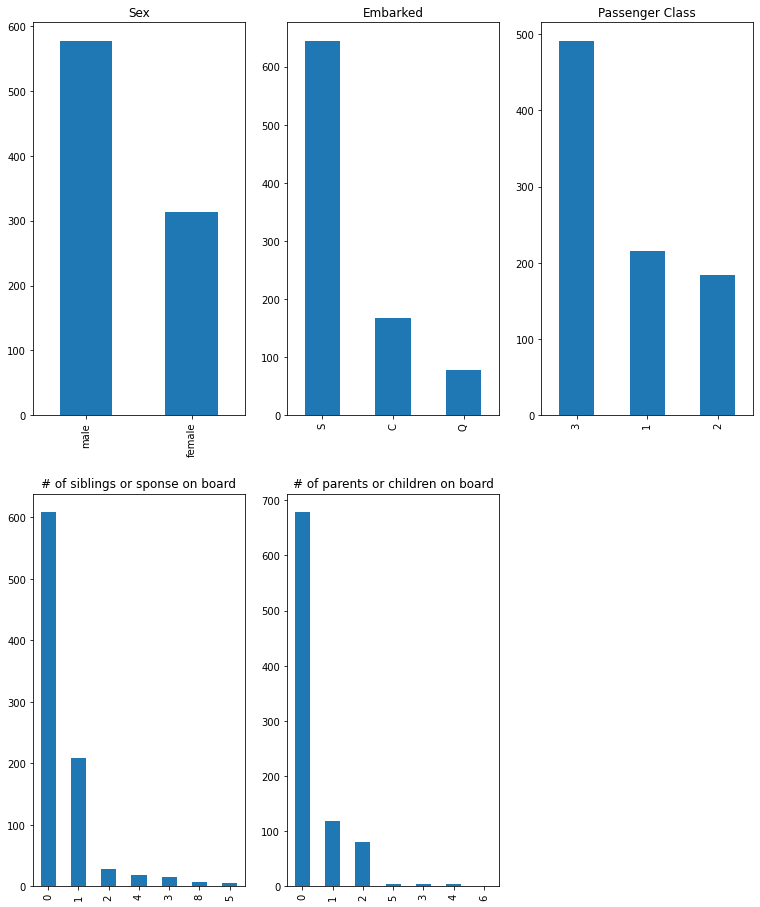

In [8]:
#let check the column distribution for columns
plt.figure()
plt.subplots_adjust(bottom=2,top=8,left=5,right=7)
plt.subplot(231)
train['Sex'].value_counts().plot.bar(figsize=(5,2),title='Sex')
plt.subplot(232)
train['Embarked'].value_counts().plot.bar(figsize=(5,2),title='Embarked')
plt.subplot(233)
train['Pclass'].value_counts().plot.bar(figsize=(5,2),title='Passenger Class')
plt.subplot(234)
train['SibSp'].value_counts().plot.bar(figsize=(5,2),title='# of siblings or sponse on board')
plt.subplot(235)
train['Parch'].value_counts().plot.bar(figsize=(5,2),title='# of parents or children on board')

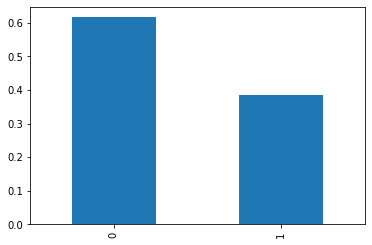

In [9]:
#lets check distribution on dependent variable
train['Survived'].value_counts(normalize=True).plot.bar()

Dataset is not fully balanced. Number of Survivers is lesser (around 40%)

In [10]:
#lets check the count of unique values in dataframe
train.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
#to see the column statistics
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
#replace the missing values with Median age
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [13]:
#binning age
bin = [i for i in range(0,85,5)]
test['bin_age'] = pd.cut(test['Age'],bins=bin)
train['bin_age'] = pd.cut(train['Age'],bins=bin)

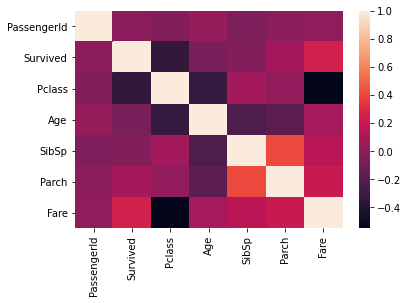

In [14]:
sns.heatmap(train.corr())

In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [16]:
test.drop(['Age'],axis=1,inplace=True)
train.drop(['Age'],axis=1,inplace=True)

In [17]:
test.drop(['Name'],axis=1,inplace=True)
train.drop(['Name'],axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Ticket       891 non-null    object  
 7   Fare         891 non-null    float64 
 8   Cabin        204 non-null    object  
 9   Embarked     889 non-null    object  
 10  bin_age      891 non-null    category
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 71.5+ KB


In [19]:
#since ticket column is just ticket number, dropping this column
train.drop(['Ticket'],inplace=True,axis=1)
test.drop(['Ticket'],inplace=True,axis=1)

In [20]:
#Similarly for Passenger ID coulmn
train.drop(['PassengerId'],inplace=True,axis=1)
test.drop(['PassengerId'],inplace=True,axis=1)

In [21]:
#Similarly for Cabin coulmn
train.drop(['Cabin'],inplace=True,axis=1)
test.drop(['Cabin'],inplace=True,axis=1)

In [22]:
#Cabin has lot of missing values. lets fill it using backfill
'''train['Cabin'].fillna(method='bfill',inplace=True)
train['Cabin'].fillna(method='ffill',inplace=True)
test['Cabin'].fillna(method='bfill',inplace=True)
test['Cabin'].fillna(method='ffill',inplace=True)'''

"train['Cabin'].fillna(method='bfill',inplace=True)\ntrain['Cabin'].fillna(method='ffill',inplace=True)\ntest['Cabin'].fillna(method='bfill',inplace=True)\ntest['Cabin'].fillna(method='ffill',inplace=True)"

In [23]:
#will capture cabin type (B,C...) from Cabin column
'''train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]'''
#I feel that brining in Cabin column has decreased my accuracy.

"train['Cabin'] = train['Cabin'].str[:1]\ntest['Cabin'] = test['Cabin'].str[:1]"

In [24]:
#record with missing value in Fare column
test[test.Fare.isnull()]

,Pclass,Sex,SibSp,Parch,Fare,Embarked,bin_age
152,3,male,0,0,NaN,S,"(60, 65]"


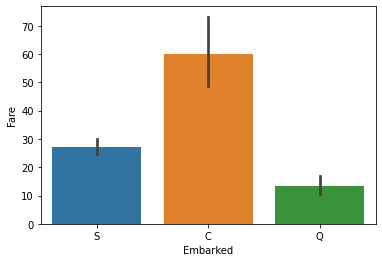

In [25]:
#lets check the relation between embargation port and Fare. 
#This is find that one missing fare value in Test dataset
sns.barplot(x=train['Embarked'],y=train['Fare'])

In [26]:
#since Missing fare row is from passenger class 3
#and there is high correlation between class and fare
#we will impute the missing value as Mode of class 3 from Train set
from scipy import stats
train.groupby(['Pclass']).agg(stats.mode)

,Survived,Sex,SibSp,Parch,Fare,Embarked,bin_age
Pclass,,,,,,,
1,"([1], [136])","([male], [122])","([0], [137])","([0], [163])","([26.55], [15])","([S], [127])","([(25, 30]], [49])"
2,"([0], [97])","([male], [108])","([0], [120])","([0], [134])","([13.0], [42])","([S], [164])","([(25, 30]], [42])"
3,"([0], [372])","([male], [347])","([0], [351])","([0], [381])","([8.05], [43])","([S], [353])","([(25, 30]], [194])"


In [27]:
test['Fare'].fillna(8.05,inplace=True)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    object  
 2   SibSp     418 non-null    int64   
 3   Parch     418 non-null    int64   
 4   Fare      418 non-null    float64 
 5   Embarked  418 non-null    object  
 6   bin_age   418 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 21.0+ KB


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  889 non-null    object  
 7   bin_age   891 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 50.6+ KB


In [30]:
#dropping two rows with missing data in Embarked Column
train.dropna(subset=['Embarked'],inplace=True)

In [31]:
#encode variable using LabelEncoder
'''def lblfn(cl):
  lb = LabelEncoder()
  lb = lb.fit(train[cl])
  train[cl] = lb.transform(train[cl])
  test[cl] = lb.transform(test[cl])
  print(cl,' encoded')

#lblfn('Embarked')
lblfn('Sex')
lblfn('Cabin')
#lblfn('bin_age')'''

"def lblfn(cl):\n  lb = LabelEncoder()\n  lb = lb.fit(train[cl])\n  train[cl] = lb.transform(train[cl])\n  test[cl] = lb.transform(test[cl])\n  print(cl,' encoded')\n\n#lblfn('Embarked')\nlblfn('Sex')\nlblfn('Cabin')\n#lblfn('bin_age')"

In [32]:
#lets create dummy variables
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          889 non-null    int64  
 1   Pclass            889 non-null    int64  
 2   SibSp             889 non-null    int64  
 3   Parch             889 non-null    int64  
 4   Fare              889 non-null    float64
 5   Sex_male          889 non-null    uint8  
 6   Embarked_Q        889 non-null    uint8  
 7   Embarked_S        889 non-null    uint8  
 8   bin_age_(5, 10]   889 non-null    uint8  
 9   bin_age_(10, 15]  889 non-null    uint8  
 10  bin_age_(15, 20]  889 non-null    uint8  
 11  bin_age_(20, 25]  889 non-null    uint8  
 12  bin_age_(25, 30]  889 non-null    uint8  
 13  bin_age_(30, 35]  889 non-null    uint8  
 14  bin_age_(35, 40]  889 non-null    uint8  
 15  bin_age_(40, 45]  889 non-null    uint8  
 16  bin_age_(45, 50]  889 non-null    uint8  
 1

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   SibSp             418 non-null    int64  
 2   Parch             418 non-null    int64  
 3   Fare              418 non-null    float64
 4   Sex_male          418 non-null    uint8  
 5   Embarked_Q        418 non-null    uint8  
 6   Embarked_S        418 non-null    uint8  
 7   bin_age_(5, 10]   418 non-null    uint8  
 8   bin_age_(10, 15]  418 non-null    uint8  
 9   bin_age_(15, 20]  418 non-null    uint8  
 10  bin_age_(20, 25]  418 non-null    uint8  
 11  bin_age_(25, 30]  418 non-null    uint8  
 12  bin_age_(30, 35]  418 non-null    uint8  
 13  bin_age_(35, 40]  418 non-null    uint8  
 14  bin_age_(40, 45]  418 non-null    uint8  
 15  bin_age_(45, 50]  418 non-null    uint8  
 16  bin_age_(50, 55]  418 non-null    uint8  
 1

In [35]:
y = train.iloc[:,0]
x = train.iloc[:,1:]

In [36]:
x = StandardScaler().fit_transform(x)
train = StandardScaler().fit_transform(train)

In [37]:
#lets use stratified K fold for validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced',random_state=42)
itr = 0
scores = []
for train_idx,test_idx in skf.split(x,y):
  #print(train_idx)
  x_train,x_test = x[train_idx],x[test_idx]
  y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
  classifier.fit(x_train,y_train)
  pred_y = classifier.predict(x_test)
  scoree = accuracy_score(y_test,pred_y)
  print('Accuracy Score of ',str(itr),' itration is ',scoree)
  scores.append(scoree)
  itr += 1
scores = np.array(scores)
print('Mean of Scores is using Logistic Regression',scores.mean())

Accuracy Score of  0  itration is  0.8089887640449438
Accuracy Score of  1  itration is  0.7640449438202247
Accuracy Score of  2  itration is  0.7640449438202247
Accuracy Score of  3  itration is  0.8539325842696629
Accuracy Score of  4  itration is  0.7528089887640449
Accuracy Score of  5  itration is  0.8426966292134831
Accuracy Score of  6  itration is  0.797752808988764
Accuracy Score of  7  itration is  0.8314606741573034
Accuracy Score of  8  itration is  0.7865168539325843
Accuracy Score of  9  itration is  0.7954545454545454
Mean of Scores is using Logistic Regression 0.799770173646578


In [39]:
from sklearn.tree import DecisionTreeClassifier
deciclass = DecisionTreeClassifier(random_state=42,class_weight='balanced')
itr = 0
scores = []
for train_idx,test_idx in skf.split(x,y):
  #print(train_idx)
  x_train,x_test = x[train_idx],x[test_idx]
  y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
  deciclass.fit(x_train,y_train)
  pred_y = deciclass.predict(x_test)
  scoree = accuracy_score(y_test,pred_y)
  print('Accuracy Score of ',str(itr),' itration is ',scoree)
  scores.append(scoree)
  itr += 1
scores = np.array(scores)
print('Mean of Scores is using Decision Tree Classifier',scores.mean())

Accuracy Score of  0  itration is  0.8426966292134831
Accuracy Score of  1  itration is  0.8089887640449438
Accuracy Score of  2  itration is  0.7303370786516854
Accuracy Score of  3  itration is  0.6853932584269663
Accuracy Score of  4  itration is  0.7191011235955056
Accuracy Score of  5  itration is  0.6853932584269663
Accuracy Score of  6  itration is  0.797752808988764
Accuracy Score of  7  itration is  0.7415730337078652
Accuracy Score of  8  itration is  0.7303370786516854
Accuracy Score of  9  itration is  0.8068181818181818
Mean of Scores is using Decision Tree Classifier 0.7548391215526047


In [40]:
#let see if we can increase accuray using Random Forest
from sklearn.ensemble import RandomForestClassifier
clsswt = {0:1,1:3} #using this class weight, accuracy increased
rndfrst = RandomForestClassifier(random_state=42,class_weight=clsswt)
itr = 0
scores = []
for train_idx,test_idx in skf.split(x,y):
  #print(train_idx)
  x_train,x_test = x[train_idx],x[test_idx]
  y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
  rndfrst.fit(x_train,y_train)
  pred_y = rndfrst.predict(x_test)
  scoree = accuracy_score(y_test,pred_y)
  print('Accuracy Score of ',str(itr),' itration is ',scoree)
  scores.append(scoree)
  itr += 1
scores = np.array(scores)
print('Mean of Scores using Random Forest Classifier',scores.mean())

Accuracy Score of  0  itration is  0.797752808988764
Accuracy Score of  1  itration is  0.8314606741573034
Accuracy Score of  2  itration is  0.7528089887640449
Accuracy Score of  3  itration is  0.7640449438202247
Accuracy Score of  4  itration is  0.7640449438202247
Accuracy Score of  5  itration is  0.7191011235955056
Accuracy Score of  6  itration is  0.7865168539325843
Accuracy Score of  7  itration is  0.8314606741573034
Accuracy Score of  8  itration is  0.7752808988764045
Accuracy Score of  9  itration is  0.8295454545454546
Mean of Scores using Random Forest Classifier 0.7852017364657815


In [41]:
#lets try SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

from sklearn.ensemble import RandomForestClassifier
clsswt = {0:1,1:15} #using this class weight, accuracy increased
rndfrst = RandomForestClassifier(random_state=42,class_weight=clsswt)
itr = 0
scores = []
for train_idx,test_idx in skf.split(x_smote,y_smote):
  #print(train_idx)
  x_train,x_test = x_smote[train_idx],x_smote[test_idx]
  y_train,y_test = y_smote[train_idx],y_smote[test_idx]
  rndfrst.fit(x_train,y_train)
  pred_y = rndfrst.predict(x_test)
  scoree = accuracy_score(y_test,pred_y)
  print('Accuracy Score of ',str(itr),' itration is ',scoree)
  scores.append(scoree)
  itr += 1
scores = np.array(scores)
print('Mean of Scores using Random Forest Classifier',scores.mean())

Accuracy Score of  0  itration is  0.8
Accuracy Score of  1  itration is  0.8090909090909091
Accuracy Score of  2  itration is  0.7909090909090909
Accuracy Score of  3  itration is  0.7636363636363637
Accuracy Score of  4  itration is  0.8272727272727273
Accuracy Score of  5  itration is  0.7363636363636363
Accuracy Score of  6  itration is  0.7818181818181819
Accuracy Score of  7  itration is  0.7727272727272727
Accuracy Score of  8  itration is  0.8073394495412844
Accuracy Score of  9  itration is  0.8532110091743119
Mean of Scores using Random Forest Classifier 0.7942368640533778


In [42]:
from sklearn.svm import SVC
clsswt = {0:1,1:3} #using this class weight, accuracy increased
svc = SVC(random_state=42,class_weight='balanced')
itr = 0
scores = []
for train_idx,test_idx in skf.split(x,y):
  #print(train_idx)
  x_train,x_test = x[train_idx],x[test_idx]
  y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
  svc.fit(x_train,y_train)
  pred_y = svc.predict(x_test)
  scoree = accuracy_score(y_test,pred_y)
  print('Accuracy Score of ',str(itr),' itration is ',scoree)
  scores.append(scoree)
  itr += 1
scores = np.array(scores)
print('Mean of Scores using SV Classifier',scores.mean())

Accuracy Score of  0  itration is  0.8651685393258427
Accuracy Score of  1  itration is  0.797752808988764
Accuracy Score of  2  itration is  0.7865168539325843
Accuracy Score of  3  itration is  0.8089887640449438
Accuracy Score of  4  itration is  0.7865168539325843
Accuracy Score of  5  itration is  0.797752808988764
Accuracy Score of  6  itration is  0.8089887640449438
Accuracy Score of  7  itration is  0.8651685393258427
Accuracy Score of  8  itration is  0.797752808988764
Accuracy Score of  9  itration is  0.8181818181818182
Mean of Scores using SV Classifier 0.8132788559754852


In [52]:
#lets train mode on smote data sets
rndfrst.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
#function to predict output using any new predictor and write same in submission file
def predwrite(mdl,name):
  test_pred = mdl.predict(test)
  output = pd.DataFrame({'PassengerId':test_orig.PassengerId,'Survived':test_pred})
  file_name = 'my_submission_' + name + '.csv'
  output.to_csv(file_name,index=False)

In [55]:
predwrite(rndfrst,'rndfrst')

Got best score from Random Forest along with SMOTE